In [1]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

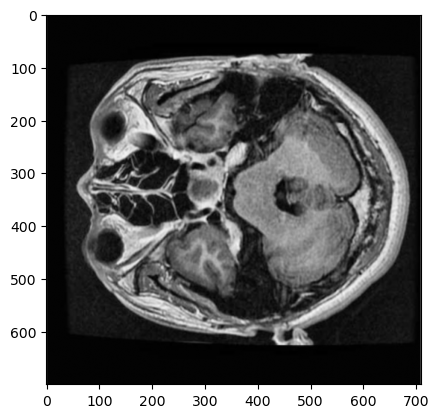

In [3]:
img = img_as_float(io.imread("images/Brain_image.png"))
plt.imshow(img)

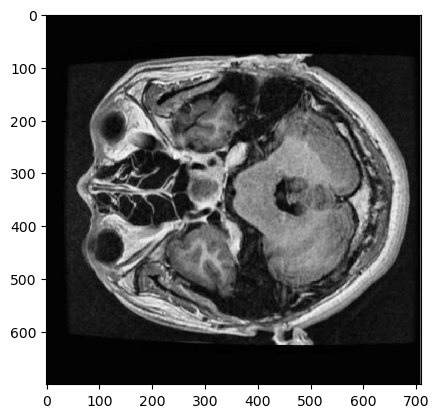

In [13]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
denoise = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5,
                           patch_distance=6, channel_axis=-1 )
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

(array([  5397.,  15141.,  36831., 329364.,   8097.,   4116.,   3696.,
          3390.,   4461.,   4731.,   6150.,   8109.,  10599.,  12861.,
         15447.,  18489.,  21477.,  23895.,  26151.,  27231.,  27219.,
         25944.,  23682.,  21444.,  18465.,  16458.,  14448.,  12051.,
         10134.,   8721.,   7545.,   6621.,   6105.,   5523.,   4986.,
          4578.,   4269.,   4179.,   3825.,   3699.,   3651.,   3348.,
          3141.,   3291.,   3246.,   3024.,   3018.,   3156.,   2871.,
          2925.,   2895.,   3108.,   2889.,   2988.,   2997.,   2937.,
          2862.,   2805.,   3126.,   2895.,   2889.,   2898.,   3090.,
          2973.,   3066.,   3063.,   2913.,   3027.,   3312.,   3288.,
          3090.,   3267.,   3369.,   3276.,   3612.,   3612.,   3675.,
          3501.,   3546.,   3900.,   3774.,   3900.,   3849.,   3951.,
          4128.,   4032.,   4074.,   4425.,   4398.,   4488.,   4425.,
          4758.,   4365.,   4641.,   4758.,   4749.,   4779.,   5067.,
      

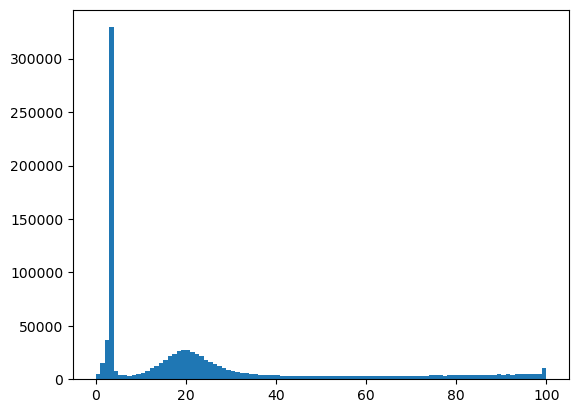

In [33]:
plt.hist(denoise_img_as_8byte.flat, bins=100, range=(0,100))

In [34]:
segm1 = (denoise_img_as_8byte <= 2.5)
segm2 = (denoise_img_as_8byte > 2.5) & (denoise_img_as_8byte <= 7.5)
segm3 = (denoise_img_as_8byte > 7.5) & (denoise_img_as_8byte <= 30)
segm4 = (denoise_img_as_8byte > 30)

print(denoise_img_as_8byte.shape)

(700, 710, 4)


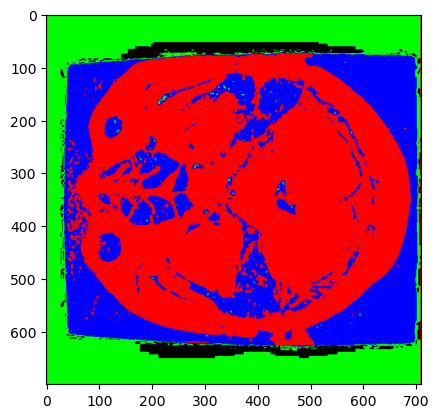

In [35]:
# Create a blank array for all segments
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3))

# Check if the boolean masks are 2D
if segm1.ndim == 3:
    segm1 = segm1[:, :, 0]
if segm2.ndim == 3:
    segm2 = segm2[:, :, 0]
if segm3.ndim == 3:
    segm3 = segm3[:, :, 0]
if segm4.ndim == 3:
    segm4 = segm4[:, :, 0]

# Assign RGB values to segments
all_segments[segm1] = (0, 0, 0)  # Red
all_segments[segm2] = (0, 1, 0)  # Green
all_segments[segm3] = (0, 0, 1)  # Blue
all_segments[segm4] = (1, 0, 0)  
plt.imshow(all_segments)

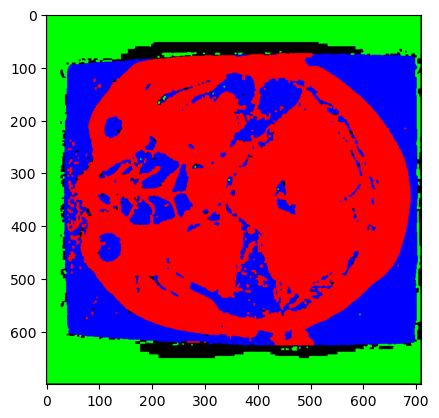

In [37]:
from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but 714, 901, 3

all_segments_cleaned[segm1_closed] = (0,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,0,0)

plt.imshow(all_segments_cleaned)